# i523 Big Data Analytics Project
### HID224 - Neha Rawat
## * Big Data Analytics in Detection of DDoS (Distributed Denial-of-Service) attacks *
With the increase in internet traffic, threats on the network have also increased. Denial-of-service attacks are cyber attacks wherein a perpetrator, due to any kind of malicious intent, tries to make a resource on the network unavailable to its intended users and carries it out by swamping the system or resource with excess requests in order to overload it and prevent users from accessing it. A much more dangerous variety of such an attack is if it is distributed i.e. coming from various sources. Big Data analytics, however, can be used to detect such attacks by having the ability to store the voluminous logs of such attacks and using the data and machine learning techniques to design an anomaly detection system (using a classification model) to detect and prevent these attacks. This project will aim to explore such classification models, design and train the most optimum model and display its effects using a DDoS logs dataset.

### Data Description
-  We will be using the dataset used for the KDD Cup of 1999, which has been derived from the 1998 DARPA Intrusion Detection Evaluation Program dataset. This was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection. The data includes a wide variety of intrusions simulated in a military network environment.
<br>
-  Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN. They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks. The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic. This was processed into about five million connection records. 
<br>
-  KDD Cup 1999 data link: [link_here](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) <br>
-  Original DARPA datasets link: [link_here](https://www.ll.mit.edu/ideval/data/1998data.html)
<br>
-  For the data analysis and demonstration of our model, we will use 10 percent of the KDD Cup'99 training dataset (~500k rows) and test it on 10 percent of the test dataset (~300k rows).
<br>
-  The data consists of five types of network traffic logs: normal traffic, DOS/DDoS - Denial of Service traffic, R2L- unauthorized access from a remote machine, U2R- unauthorized access to local superuser (root) privileges and probing- surveillance and other probing. This makes the task of analysis and prediction much more realistic, as we attempt to classify the "bad traffic" from the "normal traffic". Another important point to note is that the datasets contain a total of 24 training attack types (subsets of the above four), with an additional 14 types in the test data only. The purpose behind adding the 14 extra types in the test dataset was to prove that most new attacks are just variants of pre-existing attack types and hence can be sufficiently detected using data from the latter.

In [1]:
# Reading dataset using Pandas
#Datasets being used for the analysis are the 10 percent datasets placed on Google Drive under "HID224"
#Place the code and datasets in your default directory for Jupyter Notebook

#Loading the 10 percent training dataset
import pandas as pd
labels_data = ["duration","protocol_type","service","flag","src_bytes", "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type"]
kdd_train_10percent = pd.read_csv("kddcup_data_10_percent.csv", header=None, names = labels_data)
kdd_train_10percent.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [2]:
kdd_train_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Loading the 10 percent testing dataset
kdd_test_10percent = pd.read_csv("corrected.csv", header=None, names = labels_data)
kdd_test_10percent.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
5,0,udp,private,SF,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
8,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
9,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal.


In [4]:
kdd_test_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Exploration
We now proceed with some basic data exploration on the training dataset. All modifications made on the training dataset (feauture engineering) will be replicated on the test dataset (to ensure apples-to-apples comparison).

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

%matplotlib inline

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
#Checking for null values in train and test datasets

kdd_train_10percent.isnull().any().any()
kdd_test_10percent.isnull().any().any()

#No nulls found

False

False

In [8]:
#Comparing categorical variables across train and test datasets

len(kdd_train_10percent.protocol_type.unique())
sorted(kdd_train_10percent.protocol_type.unique())

3

['icmp', 'tcp', 'udp']

In [9]:
len(kdd_test_10percent.protocol_type.unique())
sorted(kdd_test_10percent.protocol_type.unique())

3

['icmp', 'tcp', 'udp']

In [10]:
len(kdd_train_10percent.service.unique())
sorted(kdd_train_10percent.service.unique())

66

['IRC',
 'X11',
 'Z39_50',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'hostnames',
 'http',
 'http_443',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois']

In [11]:
len(kdd_test_10percent.service.unique())
sorted(kdd_test_10percent.service.unique())

65

['IRC',
 'X11',
 'Z39_50',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'hostnames',
 'http',
 'http_443',
 'icmp',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois']

In [12]:
len(kdd_train_10percent.flag.unique())
sorted(kdd_train_10percent.flag.unique())

11

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

In [13]:
len(kdd_test_10percent.flag.unique())
sorted(kdd_test_10percent.flag.unique())

11

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

We see that the "service" column has one less type in the test dataset than in the train dataset. We would not have been aware of this if we had not checked the test dataset. For simplicity, we remove the categorical variable columns for our analysis.

In [14]:
#Removing the categorical variable columns
new_labels = ["duration","src_bytes", "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type"]
kdd_train_10per_mod = kdd_train_10percent[new_labels]
kdd_train_10per_mod.shape
kdd_train_10per_mod.describe()

(494021, 39)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Do the same for test data to keep the columns consistent

kdd_test_10per_mod = kdd_test_10percent[new_labels]
kdd_test_10per_mod.shape
kdd_test_10per_mod.describe()

(311029, 39)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


23

DOS.       391458
normal.     97278
probe.       4107
R2L.         1126
U2R            52
Name: attack_type, dtype: int64


Text(0.5,0,'Attack Types in Training Data')

Text(0,0.5,'Value Counts')

38

DOS.       229853
normal.     60593
R2L.        16189
probe.       4166
U2R           228
Name: attack_type, dtype: int64


Text(0.5,0,'Attack Types in Test Data')

Text(0,0.5,'Value Counts')

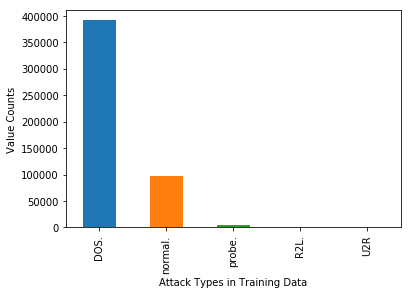

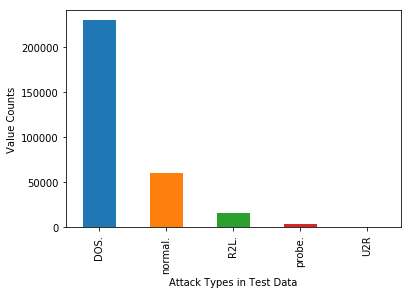

In [85]:
#Exploring the target variable
#According to the data documentation the attack types can be divided into "normal" and 4 different attack types (in the train and test data)

attack_labs_all = kdd_train_10per_mod['attack_type'].copy()
len(attack_labs_all.unique())

dos_list = ["back.","land.","neptune.","pod.","smurf.","teardrop."]
utr_list = ["buffer_overflow.","loadmodule.","perl.","rootkit."]
rtl_list = ["ftp_write.","guess_passwd.","imap.","multihop.","phf.","spy.","warezclient.","warezmaster."]
probe_list = ["ipsweep.","nmap.","portsweep.","satan."]

attack_labs_all[attack_labs_all.isin(dos_list)] = "DOS."
attack_labs_all[attack_labs_all.isin(utr_list)] = "U2R"
attack_labs_all[attack_labs_all.isin(rtl_list)] = "R2L."
attack_labs_all[attack_labs_all.isin(probe_list)] = "probe."

df = attack_labs_all.value_counts()
print(df)
plt.figure()
df.plot(kind='bar')
plt.xlabel("Attack Types in Training Data")
plt.ylabel("Value Counts")

#We see that majority of the attacks are DOS attacks (98.67 percent)
#So for simplicity we will just classify the labels as "normal." and "bad." attacks

#Checking in the test dataset as well (has extra attack types too)
attack_labs_tall = kdd_test_10per_mod['attack_type'].copy()
len(attack_labs_tall.unique())

dos_list = ["back.","land.","neptune.","pod.","smurf.","teardrop.","apache2.","mailbomb.","processtable.","udpstorm."]
utr_list = ["buffer_overflow.","loadmodule.","perl.","rootkit.","ps.","sqlattack.","xterm.","httptunnel."]
rtl_list = ["ftp_write.","guess_passwd.","imap.","multihop.","phf.","spy.","warezclient.","warezmaster.","named.",
           "sendmail.","snmpgetattack.","snmpguess.","worm.","xlock.","xsnoop."]
probe_list = ["ipsweep.","nmap.","portsweep.","satan.","mscan.","saint."]

attack_labs_tall[attack_labs_tall.isin(dos_list)] = "DOS."
attack_labs_tall[attack_labs_tall.isin(utr_list)] = "U2R"
attack_labs_tall[attack_labs_tall.isin(rtl_list)] = "R2L."
attack_labs_tall[attack_labs_tall.isin(probe_list)] = "probe."

df = attack_labs_tall.value_counts()
print(df)
plt.figure()
df.plot(kind='bar')
plt.xlabel("Attack Types in Test Data")
plt.ylabel("Value Counts")

#Here too we see extra attack types but maximum of the labels (out of all attack types) consist of DOS (91.78 percent) 


bad.       396743
normal.     97278
Name: attack_type, dtype: int64

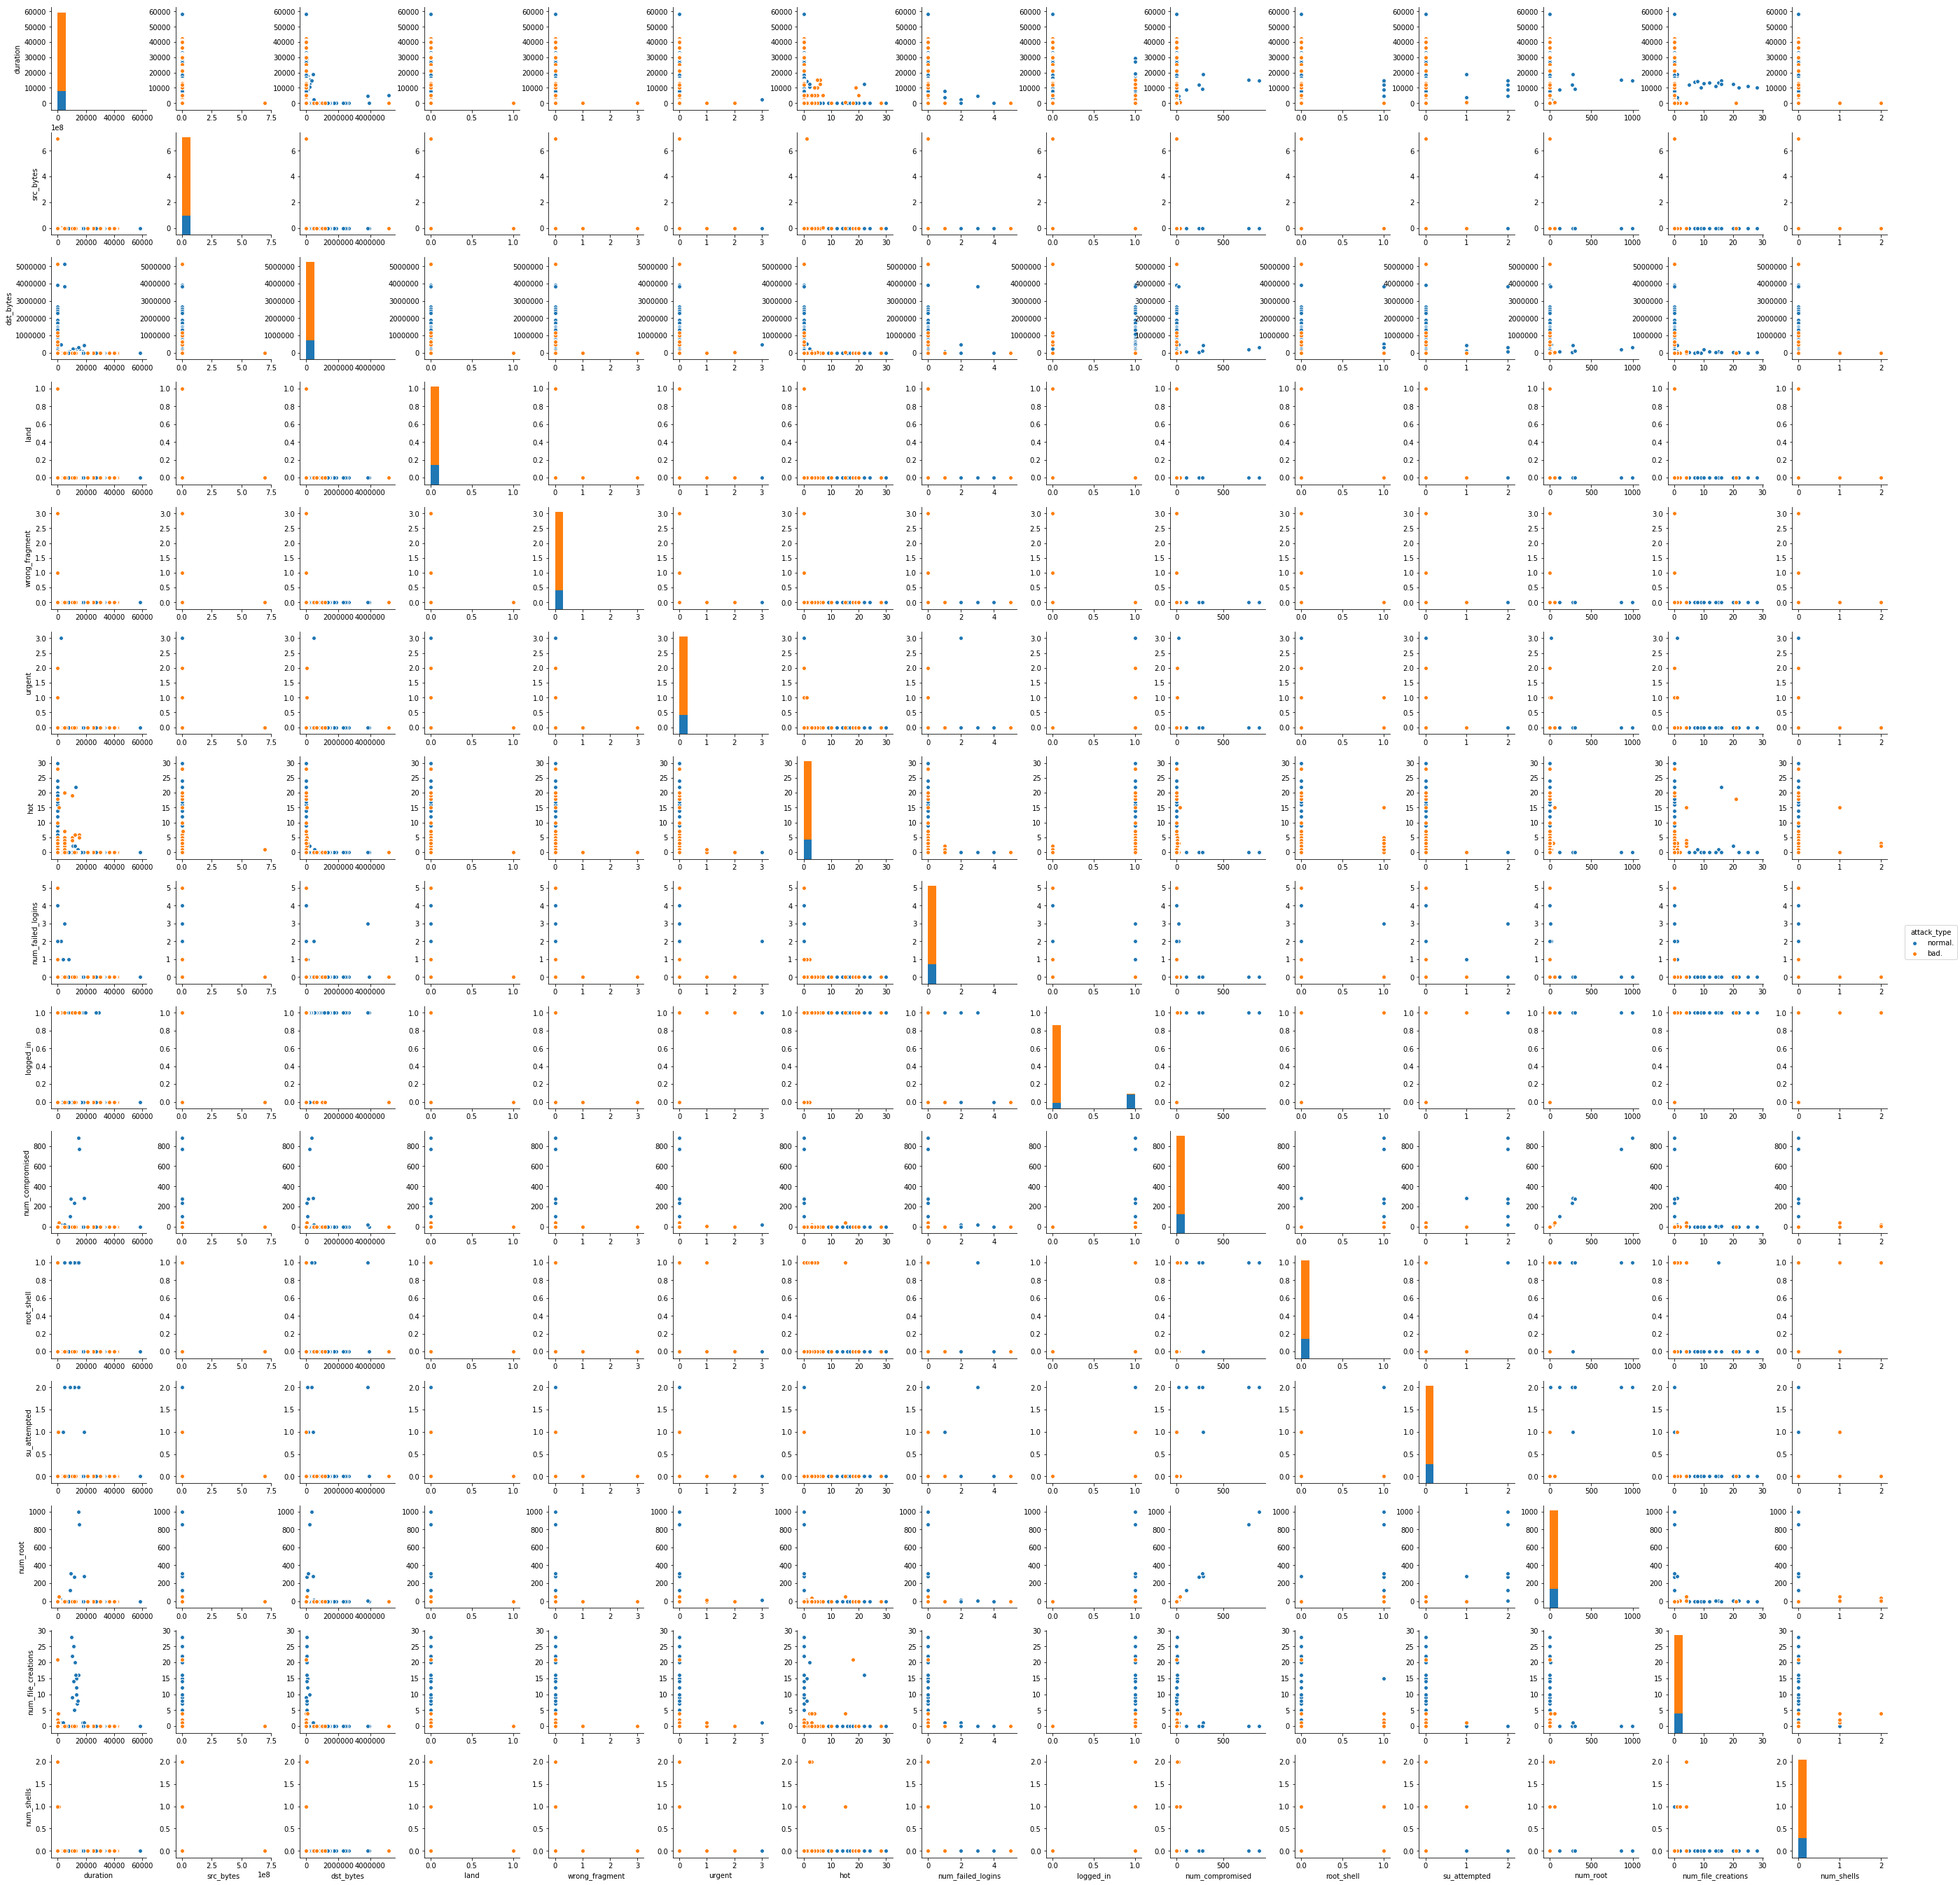

In [21]:
#Creating pairplots for some continuous variables (first 15) in the training dataset
#change the labels to only show 'normal' and 'bad' as the attack types
attack_labs = kdd_train_10per_mod['attack_type'].copy()
attack_labs[attack_labs!='normal.'] = 'bad.'
attack_labs.value_counts()

train_data_for_pairplot = pd.concat([kdd_train_10per_mod.iloc[:,0:15],attack_labs], axis=1)

#Pairplot
var_plot = sns.pairplot(data = train_data_for_pairplot, hue = "attack_type", kind='scatter')
plt.show()
#var_plot.savefig("pairplot.png") 

Even though we have plotted the distributions and correlations for the first few variables, we can make two important observations: the data seems skewed and there do not seem to be a lot of strong linear correlations visible between these variables. Since we will be using machine learning techniques like K-Nearest Neighbors (involving distance metrics) along with other algorithms and will also be verifying results using clustering (unsupervised check), we should scale the continuous variables.

### Data Preprocessing : Scaling
In this step, we scale the continuous variables in our training dataset as part of the data pre-processing. We will later use the same transformation for the test data.

In [22]:
#Creating train dataset without the target column for scaling

kdd_train_10per_var = kdd_train_10per_mod.iloc[:,0:38]
kdd_train_10per_var.shape
kdd_train_10per_var.describe()
kdd_train_10per_var.head(10)
type(kdd_train_10per_var)

#Scaling only for continuous variables -- so we remove the discrete variables
#Creating a list of the discrete valued columns (mentioned in the documentation for the dataset) and removing them from the scaling dataset
cont_labels = ["duration","src_bytes", "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "num_compromised","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
other_labels = ["land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login"]
kdd_train_10per_forscale = kdd_train_10per_mod[cont_labels]
kdd_train_10per_forscale.shape
kdd_train_10per_forscale.describe()

kdd_train_10per_others = kdd_train_10per_mod[other_labels]
kdd_train_10per_others.shape
kdd_train_10per_others.describe()

(494021, 38)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
5,0,217,2032,0,0,0,0,0,1,0,...,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
6,0,212,1940,0,0,0,0,0,1,0,...,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0
7,0,159,4087,0,0,0,0,0,1,0,...,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0
8,0,210,151,0,0,0,0,0,1,0,...,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0
9,0,212,786,0,0,0,1,0,1,0,...,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0


pandas.core.frame.DataFrame

(494021, 32)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.006433,0.000014,0.034519,0.000152,0.010212,0.011352,0.001083,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.134805,0.005510,0.782103,0.015520,1.798326,2.012718,0.096416,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,993.000000,28.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(494021, 6)

,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000
mean,0.000045,0.148247,0.000111,0.000036,0.0,0.001387
std,0.006673,0.355345,0.010551,0.007793,0.0,0.037211
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,2.000000,0.0,1.000000


In [23]:
#Now we scale the training dataset 

from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(kdd_train_10per_forscale)
train_scaler

train_scaler.mean_ 
train_scaler.scale_

#scaling the train dataset
kdd_train_10per_scaled1 = pd.DataFrame(data = train_scaler.transform(kdd_train_10per_forscale), columns=cont_labels)
kdd_train_10per_scaled1.shape
kdd_train_10per_scaled1.describe()
kdd_train_10per_scaled1.head(10)

#adding the binary valued variable columns
kdd_train_10per_scaled = pd.concat([kdd_train_10per_scaled1,kdd_train_10per_others], axis=1)
kdd_train_10per_scaled.shape
kdd_train_10per_scaled.describe()
kdd_train_10per_scaled.head(10)

StandardScaler(copy=True, with_mean=True, with_std=True)

array([  4.79793025e+01,   3.02561030e+03,   8.68532425e+02,
         6.43292492e-03,   1.41694381e-05,   3.45187755e-02,
         1.51815409e-04,   1.02121165e-02,   1.13517442e-02,
         1.08294992e-03,   1.09307094e-04,   1.00805431e-03,
         0.00000000e+00,   3.32285690e+02,   2.92906557e+02,
         1.76686659e-01,   1.76608808e-01,   5.74334087e-02,
         5.77189431e-02,   7.91547343e-01,   2.09823874e-02,
         2.89968038e-02,   2.32470778e+02,   1.88665670e+02,
         7.53779698e-01,   3.09057307e-02,   6.01934756e-01,
         6.68350131e-03,   1.76753964e-01,   1.76442621e-01,
         5.81176104e-02,   5.74116687e-02])

array([  7.07745756e+02,   9.88217101e+05,   3.30399678e+04,
         1.34805112e-01,   5.51025235e-03,   7.82101790e-01,
         1.55195812e-02,   1.79832444e+00,   2.01271629e+00,
         9.64157811e-02,   1.10199990e-02,   3.64816531e-02,
         1.00000000e+00,   2.13147196e+02,   2.46322568e+02,
         3.80716571e-01,   3.81016199e-01,   2.31623239e-01,
         2.32146746e-01,   3.88189100e-01,   8.22054097e-02,
         1.42397323e-01,   6.47453148e+01,   1.06040330e+02,
         4.10780562e-01,   1.09259002e-01,   4.81308764e-01,
         4.21328318e-02,   3.80592712e-01,   3.80919063e-01,
         2.30589274e-01,   2.30140091e-01])

(494021, 32)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,...,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05
mean,-3.625574e-14,-1.320064e-14,-5.498890e-14,-6.073146e-15,-1.529804e-14,-6.957988e-14,-8.038565e-14,-1.113045e-14,-1.364308e-14,1.653658e-14,...,-7.353653e-13,1.953080e-13,3.799918e-13,-1.392772e-13,7.581150e-13,2.700207e-13,2.263813e-13,3.603748e-13,6.990594e-13,-9.654619e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.779172e-02,-3.061686e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,-3.590542e+00,-1.779188e+00,-1.834994e+00,-2.828667e-01,-1.250621e+00,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
25%,-6.779172e-02,-3.016149e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,3.479668e-01,-1.345391e+00,-8.368938e-01,-2.828667e-01,-1.250621e+00,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
50%,-6.779172e-02,-2.535486e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,3.479668e-01,6.255576e-01,5.993962e-01,-2.828667e-01,8.270476e-01,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
75%,-6.779172e-02,-2.017381e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,3.479668e-01,6.255576e-01,5.993962e-01,8.323588e-02,8.270476e-01,-1.586293e-01,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01
max,8.234740e+01,7.016400e+02,1.560110e+02,2.220663e+01,5.444371e+02,3.831404e+01,3.221639e+02,4.915630e+02,4.933575e+02,2.903977e+02,...,3.479668e-01,6.255576e-01,5.993962e-01,8.869697e+00,8.270476e-01,2.357583e+01,2.163063e+00,2.162027e+00,4.084676e+00,4.095715e+00


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.451536,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.297085,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.142633,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-2.988182,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-2.833731,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
5,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-2.679279,-1.222796,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
6,-0.067792,-0.002847,0.032429,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.575097,-1.128492,0.599396,-0.282867,0.827048,0.790749,-0.464418,-0.463202,-0.25204,-0.249464
7,-0.067792,-0.002901,0.097411,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.420646,-1.034188,0.599396,-0.282867,-1.063631,0.790749,-0.464418,-0.463202,-0.25204,-0.249464
8,-0.067792,-0.002849,-0.021717,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.466981,-0.939885,0.599396,-0.282867,-1.001301,0.790749,-0.464418,-0.463202,-0.25204,-0.249464
9,-0.067792,-0.002847,-0.002498,-0.04772,-0.002571,1.234470,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.466981,-0.845581,0.599396,-0.282867,-1.001301,1.028094,-0.464418,-0.463202,-0.25204,-0.249464


(494021, 38)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
count,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,...,4.940210e+05,4.940210e+05,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000
mean,-3.625574e-14,-1.320064e-14,-5.498890e-14,-6.073146e-15,-1.529804e-14,-6.957988e-14,-8.038565e-14,-1.113045e-14,-1.364308e-14,1.653658e-14,...,2.263813e-13,3.603748e-13,6.990594e-13,-9.654619e-14,0.000045,0.148247,0.000111,0.000036,0.0,0.001387
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.006673,0.355345,0.010551,0.007793,0.0,0.037211
min,-6.779172e-02,-3.061686e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-6.779172e-02,-3.016149e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,-6.779172e-02,-2.535486e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,-6.779172e-02,-2.017381e-03,-2.628733e-02,-4.772019e-02,-2.571468e-03,-4.413591e-02,-9.782185e-03,-5.678684e-03,-5.640012e-03,-1.123208e-02,...,-4.644176e-01,-4.632024e-01,-2.520395e-01,-2.494640e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,8.234740e+01,7.016400e+02,1.560110e+02,2.220663e+01,5.444371e+02,3.831404e+01,3.221639e+02,4.915630e+02,4.933575e+02,2.903977e+02,...,2.163063e+00,2.162027e+00,4.084676e+00,4.095715e+00,1.000000,1.000000,1.000000,2.000000,0.0,1.000000


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
5,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
6,-0.067792,-0.002847,0.032429,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
7,-0.067792,-0.002901,0.097411,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
8,-0.067792,-0.002849,-0.021717,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0
9,-0.067792,-0.002847,-0.002498,-0.04772,-0.002571,1.234470,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0


In [24]:
#Applying the same transformations on the test dataset

kdd_test_10per_var = kdd_test_10per_mod.iloc[:,0:38]
kdd_test_10per_var.shape
kdd_test_10per_var.describe()
kdd_test_10per_var.head(10)
type(kdd_test_10per_var)

#Creating a list of the discrete valued columns (mentioned in the documentation for the dataset) and removing them from the scaling dataset
cont_labels = ["duration","src_bytes", "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "num_compromised","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
other_labels = ["land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login"]
kdd_test_10per_forscale = kdd_test_10per_mod[cont_labels]
kdd_test_10per_forscale.shape
kdd_test_10per_forscale.describe()

kdd_test_10per_others = kdd_test_10per_mod[other_labels]
kdd_test_10per_others.shape
kdd_test_10per_others.describe()

#scaling the test dataset
kdd_test_10per_scaled1 = pd.DataFrame(data = train_scaler.transform(kdd_test_10per_forscale), columns=cont_labels)
kdd_test_10per_scaled1.shape
kdd_test_10per_scaled1.describe()
kdd_test_10per_scaled1.head(10)

#adding the binary valued variable columns
kdd_test_10per_scaled = pd.concat([kdd_test_10per_scaled1,kdd_test_10per_others], axis=1)
kdd_test_10per_scaled.shape
kdd_test_10per_scaled.describe()
kdd_test_10per_scaled.head(10)

(311029, 38)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
2,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
4,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0
5,0,105,146,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0
6,0,29,0,0,0,0,0,0,0,0,...,10,3,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0
7,0,105,146,0,0,0,0,0,0,0,...,255,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0
8,0,105,146,0,0,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
9,0,223,185,0,0,0,0,0,1,0,...,71,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0


pandas.core.frame.DataFrame

(311029, 32)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000762,0.000051,0.014677,0.002363,0.011243,0.008359,0.000958,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.040367,0.009821,0.312068,0.049990,1.958325,2.165196,0.193119,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,3.000000,3.000000,101.000000,4.000000,796.000000,878.000000,100.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(311029, 6)

,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
count,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,0.000029,0.172476,0.000199,0.000023,0.000039,0.002424
std,0.005379,0.377794,0.014117,0.005947,0.006211,0.049177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


(311029, 32)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,-0.042496,-0.001309,-0.003648,-0.042068,0.006764,-0.025370,0.142485,0.000573,-0.001487,-0.001295,...,0.043430,0.099285,0.096681,-0.054486,-0.112228,-0.050252,-0.310016,-0.308862,0.366631,0.366219
std,0.575976,0.129179,0.487899,0.299447,1.782311,0.399013,3.221101,1.088972,1.075758,2.002976,...,0.940814,0.945928,0.942328,0.878676,1.022135,0.849060,0.607725,0.611671,1.493477,1.505923
min,-0.067792,-0.003062,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,-3.590542,-1.779188,-1.834994,-0.282867,-1.250621,-0.158629,-0.464418,-0.463202,-0.252040,-0.249464
25%,-0.067792,-0.002955,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,0.347967,0.521823,0.526364,-0.282867,-1.250621,-0.158629,-0.464418,-0.463202,-0.252040,-0.249464
50%,-0.067792,-0.002535,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,-0.463202,-0.252040,-0.249464
75%,-0.067792,-0.002017,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,0.347967,0.625558,0.599396,-0.191341,0.827048,-0.158629,-0.464418,-0.463202,-0.252040,-0.249464
max,81.479854,63.571681,157.455071,22.206629,544.437104,129.095065,257.729132,442.628578,436.220770,1037.163376,...,0.347967,0.625558,0.599396,8.869697,0.827048,23.575830,2.163063,2.162027,4.084676,4.095715


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
1,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
2,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
3,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
4,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
5,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.625558,0.599396,-0.282867,-1.229844,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
6,-0.067792,-0.003032,-0.026287,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-3.436091,-1.750897,-1.104677,2.462903,-0.627320,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
7,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.606697,0.575052,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
8,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,0.347967,0.616127,0.599396,-0.191341,-1.250621,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464
9,-0.067792,-0.002836,-0.020688,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-2.493938,0.625558,0.599396,-0.282867,-1.229844,0.078715,-0.464418,-0.463202,-0.25204,-0.249464


(311029, 38)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
count,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,-0.042496,-0.001309,-0.003648,-0.042068,0.006764,-0.025370,0.142485,0.000573,-0.001487,-0.001295,...,-0.310016,-0.308862,0.366631,0.366219,0.000029,0.172476,0.000199,0.000023,0.000039,0.002424
std,0.575976,0.129179,0.487899,0.299447,1.782311,0.399013,3.221101,1.088972,1.075758,2.002976,...,0.607725,0.611671,1.493477,1.505923,0.005379,0.377794,0.014117,0.005947,0.006211,0.049177
min,-0.067792,-0.003062,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,-0.464418,-0.463202,-0.252040,-0.249464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.067792,-0.002955,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,-0.464418,-0.463202,-0.252040,-0.249464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.067792,-0.002535,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,-0.464418,-0.463202,-0.252040,-0.249464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.067792,-0.002017,-0.026287,-0.047720,-0.002571,-0.044136,-0.009782,-0.005679,-0.005640,-0.011232,...,-0.464418,-0.463202,-0.252040,-0.249464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81.479854,63.571681,157.455071,22.206629,544.437104,129.095065,257.729132,442.628578,436.220770,1037.163376,...,2.163063,2.162027,4.084676,4.095715,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
1,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
2,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
3,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
4,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
5,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
6,-0.067792,-0.003032,-0.026287,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
7,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
8,-0.067792,-0.002955,-0.021868,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,0,0,0,0,0
9,-0.067792,-0.002836,-0.020688,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.00564,-0.011232,...,-0.464418,-0.463202,-0.25204,-0.249464,0,1,0,0,0,0


### Data Analysis
Now we use the final datasets to train and run models based on the following algorithms and evaluate the best one for detection and prediction purposes:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Random Forest
- Neural Networks
- Ensemble Modeling
- Unsupervised Learning - Clustering
<br>

Since there are several different attack types mentioned in the "attack_type" label, we first classify them into "normal" and "bad" (as done in the Data Exploration section) and try to develop a model that detects "bad" logs (majority of them being DoS attacks) in the test dataset. We also implement multi-class detection for these models as well.

In [93]:
#Importing the required packages

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree

### Logistic Regression
We use a logistic regression model trained on the training dataset to predict "normal" and "bad" as well as multi-class labels for the test dataset.

bad.       250436
normal.     60593
Name: attack_type, dtype: int64

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


C:\Users\Neha Rawat\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']
[[225627  24809]
 [   994  59599]]
0.917039890171
0.942266115551
0.850848092029
0.883980813408


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

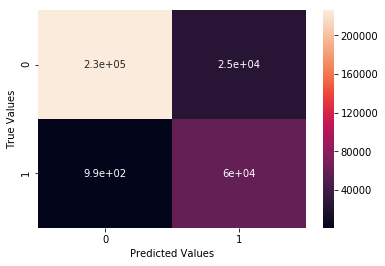

precision: [ 0.99561382  0.70608236]
recall: [ 0.90093677  0.98359546]
fscore: [ 0.94591212  0.8220495 ]
support: [250436  60593]
[[222372      0      0   7447     34]
 [     5     23      0  16149     12]
 [    49      1      6    169      3]
 [   790     26      1  59699     77]
 [   200      0      0   1342   2624]]
0.915425892762
0.522059243356
0.794119922402
0.52301673276


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

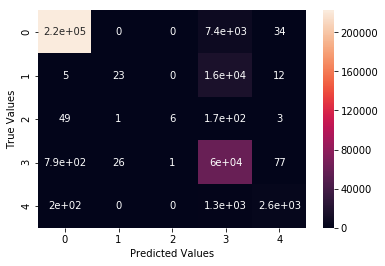

precision: [ 0.9953271   0.46        0.85714286  0.70394783  0.95418182]
recall: [ 0.96745311  0.00142072  0.02631579  0.98524582  0.62986078]
fscore: [ 0.98119218  0.00283269  0.05106383  0.82117484  0.75882013]
support: [229853  16189    228  60593   4166]


In [107]:
#Creating the "normal" and "bad" labels for test dataset as well
attack_labs_test = kdd_test_10per_mod['attack_type'].copy()
attack_labs_test[attack_labs_test!='normal.'] = 'bad.'
attack_labs_test.value_counts()

#Logistic Regression Model -- 2 labels
logrmodel = LogisticRegression(C=0.01)
logrmodel.fit(kdd_train_10per_scaled, attack_labs)
log_preds = logrmodel.predict(kdd_test_10per_scaled)
print(log_preds)

#Logistic Regression Model -- multi-labels
logrmodel1 = LogisticRegression(C=0.01,solver='sag',multi_class='ovr')
logrmodel1.fit(kdd_train_10per_scaled, attack_labs_all)
log_preds1 = logrmodel1.predict(kdd_test_10per_scaled)
print(log_preds1)

#Calculating test metrics to evaluate the model -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, log_preds))
print(metrics.accuracy_score(attack_labs_test, log_preds))
print(metrics.recall_score(attack_labs_test, log_preds,average='macro'))
print(metrics.precision_score(attack_labs_test, log_preds,average='macro'))
print(metrics.f1_score(attack_labs_test, log_preds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, log_preds)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, log_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


#Calculating test metrics to evaluate the model -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, log_preds1))
print(metrics.accuracy_score(attack_labs_tall, log_preds1))
print(metrics.recall_score(attack_labs_tall, log_preds1,average='macro'))
print(metrics.precision_score(attack_labs_tall, log_preds1,average='macro'))
print(metrics.f1_score(attack_labs_tall, log_preds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, log_preds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, log_preds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We see that the accuracy (91.70 percent) and F1 scores (88.39 percent) for 2-label predictions are good enough. Through the precision_recall_fscore_support matrix we can also see that correct prediction of "bad" labels is higher, due to higher proportion of these labels in the test as well as training data. When we try to fit a multi-class problem using logistic regression, we observe that the recall for "R2L" and "U2R" labels is very less (due to small proportion of these labels in the training dataset), whereas predictions for DOS and "normal" labels is quite good. Therefore, we will proceed to try other algorithms to try and achieve better and more balanced prediction scores.

### K-Nearest Neighbors
We use a K-Nearest Neighbors model (with k=5 and Manhattan Distance Metric) trained on the training dataset to predict "normal" and "bad" as well as multi-class labels for the test dataset.

In [62]:
#K-Nearest Neighbors
#We run the K-nearest neighbors model for k = 5
#Takes a lot of time -- around two hours

#K=5 -- 2 labels
knn_mod1 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size=600, metric='manhattan',n_jobs=-1) 
knn_mod1.fit(kdd_train_10per_scaled, attack_labs)
knn_preds1 = knn_mod1.predict(kdd_test_10per_scaled)
print(knn_preds1)

#Multi-labels
knn_mod2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size=600, metric='manhattan',n_jobs=-1) 
knn_mod2.fit(kdd_train_10per_scaled, attack_labs_all)
knn_preds2 = knn_mod2.predict(kdd_test_10per_scaled)
print(knn_preds2)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=600, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


KNeighborsClassifier(algorithm='ball_tree', leaf_size=600, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[227642  22794]
 [   977  59616]]
0.923573043028
0.946429379698
0.859566933948
0.892076055409


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

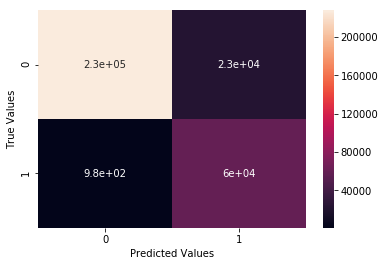

precision: [ 0.99572651  0.72340735]
recall: [ 0.90898273  0.98387603]
fscore: [ 0.95037939  0.83377272]
support: [250436  60593]
[[223384      1      0   6301    167]
 [   135    258      3  15582    211]
 [     1     10     16     64    137]
 [   768     24      8  59617    176]
 [   178      1      0    849   3138]]
0.920856254561
0.55902023168
0.801650312904
0.551786905652


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

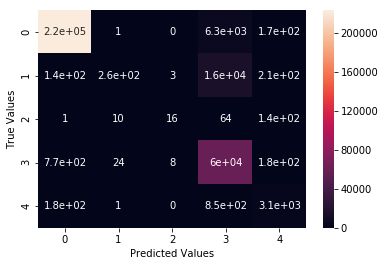

precision: [ 0.99517967  0.87755102  0.59259259  0.72339315  0.81953513]
recall: [ 0.97185593  0.01593675  0.07017544  0.98389253  0.75324052]
fscore: [ 0.98337952  0.03130498  0.1254902   0.83376921  0.78499062]
support: [229853  16189    228  60593   4166]


In [63]:
#Evaluation Metrics for KNN k=5 -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, knn_preds1))
print(metrics.accuracy_score(attack_labs_test, knn_preds1))
print(metrics.recall_score(attack_labs_test, knn_preds1,average='macro'))
print(metrics.precision_score(attack_labs_test, knn_preds1,average='macro'))
print(metrics.f1_score(attack_labs_test, knn_preds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, knn_preds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, knn_preds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for KNN k=5 -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, knn_preds2))
print(metrics.accuracy_score(attack_labs_tall, knn_preds2))
print(metrics.recall_score(attack_labs_tall, knn_preds2,average='macro'))
print(metrics.precision_score(attack_labs_tall, knn_preds2,average='macro'))
print(metrics.f1_score(attack_labs_tall, knn_preds2,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, knn_preds2)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, knn_preds2)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We see that with the use of KNN (k=5) and Manhattan Distance metric we are able to improve the accuracy (92.357 percent) and F1 score (89.20 percent) slightly more than in logistic regression for a 2-label classification. For multi-label classification as well, we see an improvement in recall scores overall and especially for "R2L" and "U2R" categories (as compared to logistic regression). Also, we see that the F1 score for "normal" labels has increased too.

### Support Vector Machine
We use a Support Vector Machine (using a linear and polynomial kernel) model trained on the training dataset to predict "normal" and "bad" as well as multi-class labels on the test dataset.

In [64]:
#Training using an SVM model (kernel = linear) -- 2 labels

svm_mod1 = BaggingClassifier(SVC(kernel='linear'),max_samples = 0.1, n_jobs=-1)
svm_mod1.fit(kdd_train_10per_scaled, attack_labs)
svm_preds1 = svm_mod1.predict(kdd_test_10per_scaled)
print(svm_preds1)

#Training using an SVM model (kernel = linear) -- multi-labels
svm_mod2 = BaggingClassifier(SVC(kernel='linear'),max_samples = 0.1, n_jobs=-1)
svm_mod2.fit(kdd_train_10per_scaled, attack_labs_all)
svm_preds2 = svm_mod2.predict(kdd_test_10per_scaled)
print(svm_preds2)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[227330  23106]
 [  1004  59589]]
0.922483112507
0.945583668046
0.858095317171
0.890689635091


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

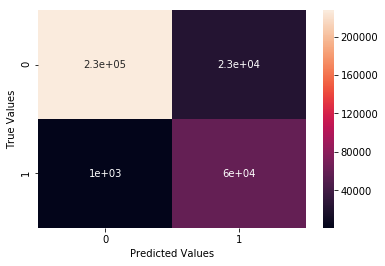

precision: [ 0.99560293  0.7205877 ]
recall: [ 0.90773691  0.98343043]
fscore: [ 0.94964179  0.83173748]
support: [250436  60593]
[[214488      0      0  15365      0]
 [     7    706      1  15465     10]
 [    23      6     10    127     62]
 [   783     56      6  59653     95]
 [   242      0      0   1037   2887]]
0.892984255487
0.539619994252
0.819765755251
0.542285908297


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

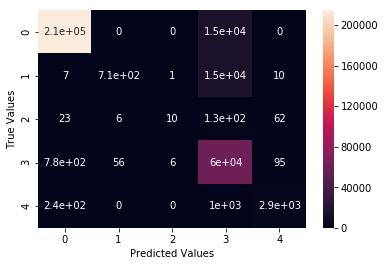

precision: [ 0.99510539  0.91927083  0.58823529  0.65089965  0.94531762]
recall: [ 0.93315293  0.04360986  0.04385965  0.98448666  0.69299088]
fscore: [ 0.96313393  0.08326945  0.08163265  0.78367052  0.79972299]
support: [229853  16189    228  60593   4166]


In [65]:
#Evaluation Metrics for SVM (kernel = linear) -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, svm_preds1))
print(metrics.accuracy_score(attack_labs_test, svm_preds1))
print(metrics.recall_score(attack_labs_test, svm_preds1,average='macro'))
print(metrics.precision_score(attack_labs_test, svm_preds1,average='macro'))
print(metrics.f1_score(attack_labs_test, svm_preds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, svm_preds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, svm_preds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for SVM (kernel = linear) -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, svm_preds2))
print(metrics.accuracy_score(attack_labs_tall, svm_preds2))
print(metrics.recall_score(attack_labs_tall, svm_preds2,average='macro'))
print(metrics.precision_score(attack_labs_tall, svm_preds2,average='macro'))
print(metrics.f1_score(attack_labs_tall, svm_preds2,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, svm_preds2)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, svm_preds2)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [66]:
#SVM using a polynomial kernel -- 2 labels
svm_mod3 = BaggingClassifier(SVC(kernel='poly',cache_size=7000),max_samples = 0.1, n_jobs=-1)
svm_mod3.fit(kdd_train_10per_scaled, attack_labs)
svm_preds3 = svm_mod3.predict(kdd_test_10per_scaled)
print(svm_preds3)

#SVM using a polynomial kernel -- multi-labels
svm_mod4 = BaggingClassifier(SVC(kernel='poly',cache_size=7000),max_samples = 0.1, n_jobs=-1)
svm_mod4.fit(kdd_train_10per_scaled, attack_labs_all)
svm_preds4 = svm_mod4.predict(kdd_test_10per_scaled)
print(svm_preds4)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[227644  22792]
 [  1273  59320]]
0.92262779355
0.943990846369
0.85843346792
0.890581158956


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

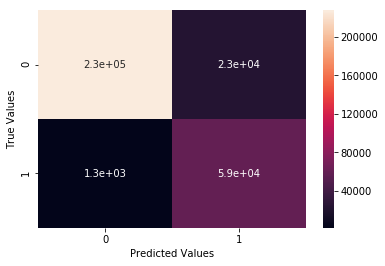

precision: [ 0.99443903  0.7224279 ]
recall: [ 0.90899072  0.97899097]
fscore: [ 0.94979691  0.8313654 ]
support: [250436  60593]
[[222990      0      0   6752    111]
 [    10    438      2  15662     77]
 [     7      5     17     74    125]
 [  1051     33      2  59362    145]
 [    93      2      0    849   3222]]
0.919621642998
0.56496929286
0.862802737883
0.564257481699


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

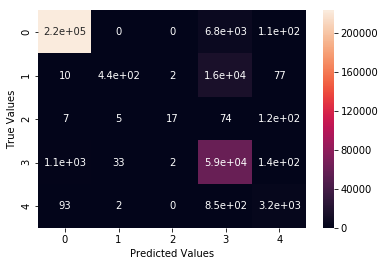

precision: [ 0.99482046  0.91631799  0.80952381  0.71780795  0.87554348]
recall: [ 0.97014179  0.02705541  0.0745614   0.97968412  0.77340374]
fscore: [ 0.98232615  0.05255895  0.13654618  0.82854591  0.82131022]
support: [229853  16189    228  60593   4166]


In [67]:
#Evaluation Metrics for SVM (kernel = polynomial) -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, svm_preds3))
print(metrics.accuracy_score(attack_labs_test, svm_preds3))
print(metrics.recall_score(attack_labs_test, svm_preds3,average='macro'))
print(metrics.precision_score(attack_labs_test, svm_preds3,average='macro'))
print(metrics.f1_score(attack_labs_test, svm_preds3,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, svm_preds3)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, svm_preds3)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for SVM (kernel = polynomial) -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, svm_preds4))
print(metrics.accuracy_score(attack_labs_tall, svm_preds4))
print(metrics.recall_score(attack_labs_tall, svm_preds4,average='macro'))
print(metrics.precision_score(attack_labs_tall, svm_preds4,average='macro'))
print(metrics.f1_score(attack_labs_tall, svm_preds4,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, svm_preds4)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, svm_preds4)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We see that the polynomial SVM performs better than logistic regression but almost similar to KNN.

### Random Forest
We now use a Random Forest model trained on the training dataset to predict "normal" and "bad" as well as multi-class labels on the test dataset.

In [98]:
#Random Forest Model -- 2 labels
rdforestmod = RandomForestClassifier(n_estimators=10,n_jobs=-1, random_state=0)
rdforestmod.fit(kdd_train_10per_scaled, attack_labs)
rdpreds = rdforestmod.predict(kdd_test_10per_scaled)
print(rdpreds)

#Random Forest Model -- multi-labels
rdforestmod1 = RandomForestClassifier(n_estimators=10,n_jobs=-1, random_state=0)
rdforestmod1.fit(kdd_train_10per_scaled, attack_labs_all)
rdpreds1 = rdforestmod1.predict(kdd_test_10per_scaled)
print(rdpreds1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[227882  22554]
 [   325  60268]]
0.926440942806
0.952288703459
0.863128452653
0.896335123835


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

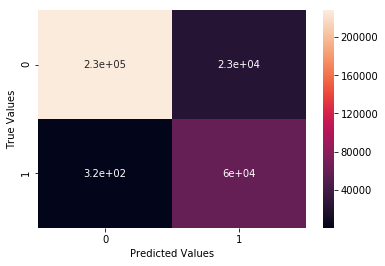

precision: [ 0.99857585  0.72768105]
recall: [ 0.90994106  0.99463634]
fscore: [ 0.95220028  0.84046996]
support: [250436  60593]
[[223802      6      0   6014     31]
 [    63    223      5  15463    435]
 [     2      3      8    204     11]
 [    57      4      2  60295    235]
 [   178      1      0    781   3206]]
0.924460420089
0.557436410762
0.803955281697
0.542680957055


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

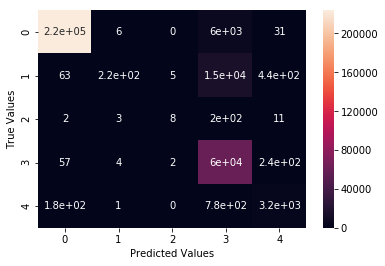

precision: [ 0.99866132  0.94092827  0.53333333  0.72857885  0.81827463]
recall: [ 0.97367448  0.01377479  0.03508772  0.99508194  0.76956313]
fscore: [ 0.98600963  0.02715208  0.06584362  0.84122776  0.7931717 ]
support: [229853  16189    228  60593   4166]


In [69]:
#Evaluation Metrics for Random Forest -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, rdpreds))
print(metrics.accuracy_score(attack_labs_test, rdpreds))
print(metrics.recall_score(attack_labs_test, rdpreds,average='macro'))
print(metrics.precision_score(attack_labs_test, rdpreds,average='macro'))
print(metrics.f1_score(attack_labs_test, rdpreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, rdpreds)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, rdpreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for Random Forest -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, rdpreds1))
print(metrics.accuracy_score(attack_labs_tall, rdpreds1))
print(metrics.recall_score(attack_labs_tall, rdpreds1,average='macro'))
print(metrics.precision_score(attack_labs_tall, rdpreds1,average='macro'))
print(metrics.f1_score(attack_labs_tall, rdpreds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, rdpreds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, rdpreds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We see that the accuracy (92.64 percent) and F1 score (89.63 percent) for the 2-label classification has improved a lot as compared to the previous models. The  F1 score for "normal" labels is also significantly higher (84.05 percent). However, in the multi-class classification, though the overall accuracy is higher, the recall values and F1 scores for "U2R" and "R2L" are low, leading to a lower F1 score overall.

### Neural Networks
We now use a Neural Network model (Multi-Layer Perceptron) trained on the training dataset to predict "normal" and "bad" labels on the test dataset.

In [70]:
#Multi Layer Perceptron Model -- 2 labels
mlpmod = MLPClassifier(activation='tanh',random_state=0)
mlpmod.fit(kdd_train_10per_scaled, attack_labs)
mlppreds = mlpmod.predict(kdd_test_10per_scaled)
print(mlppreds)

#Multi Layer Perceptron Model -- multi-labels
mlpmod1 = MLPClassifier(activation='tanh',random_state=0)
mlpmod1.fit(kdd_train_10per_scaled, attack_labs_all)
mlppreds1 = mlpmod1.predict(kdd_test_10per_scaled)
print(mlppreds1)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[227791  22645]
 [   966  59627]]
0.924087464513
0.946817630451
0.860265825686
0.892729833571


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

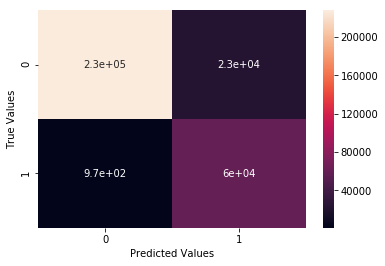

precision: [ 0.99577718  0.72475447]
recall: [ 0.9095777   0.98405756]
fscore: [ 0.95072758  0.83473209]
support: [250436  60593]
[[223577      1      0   6106    169]
 [    32     64      3  15778    312]
 [     3     12     18    146     49]
 [   758     22      4  59647    162]
 [   181      1      0   1195   2789]]
0.91983384186
0.541890202544
0.775323506598
0.539030370367


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

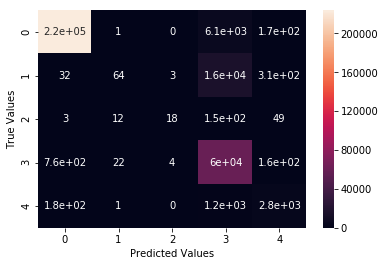

precision: [ 0.99566246  0.64        0.72        0.71974853  0.80120655]
recall: [ 0.97269559  0.0039533   0.07894737  0.98438764  0.66946711]
fscore: [ 0.98404503  0.00785806  0.14229249  0.83151988  0.72943638]
support: [229853  16189    228  60593   4166]


In [71]:
#Evaluation Metrics for an MLP Classifier -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, mlppreds))
print(metrics.accuracy_score(attack_labs_test, mlppreds))
print(metrics.recall_score(attack_labs_test, mlppreds,average='macro'))
print(metrics.precision_score(attack_labs_test, mlppreds,average='macro'))
print(metrics.f1_score(attack_labs_test, mlppreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, mlppreds)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, mlppreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for an MLP Classifier -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, mlppreds1))
print(metrics.accuracy_score(attack_labs_tall, mlppreds1))
print(metrics.recall_score(attack_labs_tall, mlppreds1,average='macro'))
print(metrics.precision_score(attack_labs_tall, mlppreds1,average='macro'))
print(metrics.f1_score(attack_labs_tall, mlppreds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, mlppreds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, mlppreds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We observe that the accuracy and F1 scores for a Multi-Layer Perceptron are very close to those for the Random Forest model for the 2-label as well as multi-label classification.<br>
The best performance that we observe from among the implemented learning models (based on accuracy) is of the Random Forest model, followed closely by the Multi-Layer Perceptron model. The best performance (based on recall and F1 score) for multi-class classification is by the polynomial SVM model.

### Ensemble Modeling
As we have already observed, Random Forest models provide the best results for the 2-label detection problem. However, for the multi-class detection problem, Polynomial SVM seem to provide a better F1 score. Here, we attempt to design an ensemble model of two random forests and one polynomial SVM model in order to improve the accuracy of the results.

In [72]:
#Ensemble Modeling - Three different learning models
#Test on 2 label as well as multi-class

rdforestmod = RandomForestClassifier(n_estimators=13,max_features='sqrt',n_jobs=-1, random_state=1)
rdforestmod1 = RandomForestClassifier(n_estimators=13,max_features='log2',n_jobs=-1, random_state=1)
polysvmmod = BaggingClassifier(SVC(kernel='poly',cache_size=7000),max_samples = 0.1, n_jobs=-1)

modelest = []
modelest.append(('randomforest', rdforestmod))
modelest.append(('randomforestanother', rdforestmod1))
modelest.append(('polysvmmod', polysvmmod))

ensemblemod = VotingClassifier(modelest,voting='soft')

#2-label
ensemblemod.fit(kdd_train_10per_scaled, attack_labs)
enspreds = ensemblemod.predict(kdd_test_10per_scaled)
print(enspreds)

#multi-label
ensemblemod1 = VotingClassifier(modelest,voting='soft')
ensemblemod1.fit(kdd_train_10per_scaled, attack_labs_all)
enspreds1 = ensemblemod1.predict(kdd_test_10per_scaled)
print(enspreds1)

VotingClassifier(estimators=[('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
        ...stimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


VotingClassifier(estimators=[('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
        ...stimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

['normal.' 'normal.' 'normal.' ..., 'normal.' 'normal.' 'normal.']


[[228013  22423]
 [   301  60292]]
0.926939288619
0.952748290005
0.863797085589
0.896983582535


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

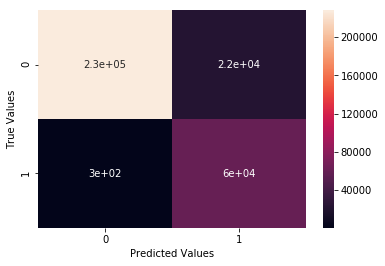

precision: [ 0.99868164  0.72891253]
recall: [ 0.91046415  0.99503243]
fscore: [ 0.95253473  0.84143244]
support: [250436  60593]
[[223529      0      0   6231     93]
 [     1    308      3  15605    272]
 [     2      3     10    176     37]
 [   632      1      1  59724    235]
 [   156      0      0    908   3102]]
0.921692189474
0.553125844344
0.850047694608
0.544609641423


[Text(33,0.5,'True Values'), Text(0.5,15,'Predicted Values')]

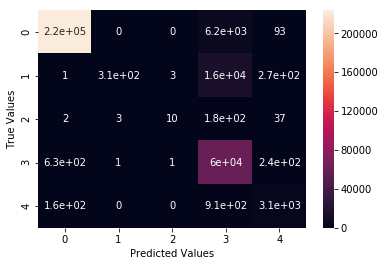

precision: [ 0.99647379  0.98717949  0.71428571  0.72266589  0.82963359]
recall: [ 0.97248676  0.01902526  0.04385965  0.98565841  0.74459914]
fscore: [ 0.98433416  0.03733107  0.08264463  0.83391861  0.78481973]
support: [229853  16189    228  60593   4166]


In [73]:
#Evaluation Metrics for the ensemble model -- 2 labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_test, enspreds))
print(metrics.accuracy_score(attack_labs_test, enspreds))
print(metrics.recall_score(attack_labs_test, enspreds,average='macro'))
print(metrics.precision_score(attack_labs_test, enspreds,average='macro'))
print(metrics.f1_score(attack_labs_test, enspreds,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_test, enspreds)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_test, enspreds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#Evaluation Metrics for the ensemble model -- multi-labels
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(attack_labs_tall, enspreds1))
print(metrics.accuracy_score(attack_labs_tall, enspreds1))
print(metrics.recall_score(attack_labs_tall, enspreds1,average='macro'))
print(metrics.precision_score(attack_labs_tall, enspreds1,average='macro'))
print(metrics.f1_score(attack_labs_tall, enspreds1,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(attack_labs_tall, enspreds1)), annot=True)
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(attack_labs_tall, enspreds1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

We observe that the accuracy and F1 score have improved significantly for the 2-label classification over the previous models by using an ensemble model system. The F1 scores for multi-class classification too are higher than the Random Forest classifier.

### Unsupervised Learning - Clustering
The above learning methods trained a model on the training data and using the training labels, which was used later to predict the corresponding labels for the test data. Here, we try a different learning technique where we use a clustering algorithm on the test data to identify patterns which we can later verify using the already provided target labels.

In [74]:
#Clustering implemented using K-Means on test dataset (n=5 clusters)

kmeans_mod = KMeans(n_clusters=5)
kmeans_mod.fit(kdd_test_10per_scaled) 
labels = kmeans_mod.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
pd.Series(labels).value_counts()

3    164804
0    101311
1     44191
2       722
4         1
dtype: int64

pandas.core.frame.DataFrame

,cluster,attack_type
0,0,normal.
1,0,normal.
2,0,normal.
3,0,bad.
4,0,bad.
5,0,bad.
6,0,normal.
7,0,normal.
8,0,bad.
9,0,normal.


,cluster,attack_type,counts
0,0,bad.,41572
1,0,normal.,59739
2,1,bad.,44076
3,1,normal.,115
4,2,bad.,717
5,2,normal.,5
6,3,bad.,164071
7,3,normal.,733
8,4,normal.,1


Text(0.5,0,'Clusters')

Text(0,0.5,'Counts')

Text(0.5,1,'Cluster Distribution')

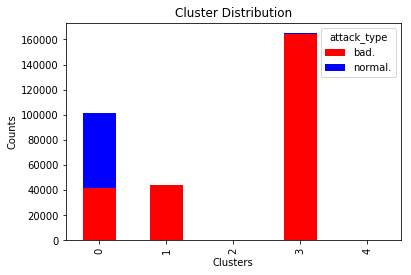

In [144]:
#Check with target labels for the test dataset

cluster_labels = pd.DataFrame(labels)
clust_map = pd.concat([cluster_labels,attack_labs_test],axis=1)
clust_map.columns = ['cluster','attack_type']
type(clust_map)
clust_map.head(10)

df = clust_map.groupby(['cluster','attack_type']).size()
df1 = pd.DataFrame(df).reset_index()
df1.columns = ['cluster','attack_type','counts']
df1.head(20)

df.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Cluster Distribution')
plt.show()

pandas.core.frame.DataFrame

,cluster,attack_type
0,0,normal.
1,0,normal.
2,0,normal.
3,0,R2L.
4,0,R2L.
5,0,R2L.
6,0,normal.
7,0,normal.
8,0,R2L.
9,0,normal.


,cluster,attack_type,counts
0,0,DOS.,24831
1,0,R2L.,15465
2,0,U2R,89
3,0,normal.,59739
4,0,probe.,1187
5,1,DOS.,40955
6,1,R2L.,9
7,1,U2R,136
8,1,normal.,115
9,1,probe.,2976


Text(0.5,0,'Clusters')

Text(0,0.5,'Counts')

Text(0.5,1,'Cluster Distribution')

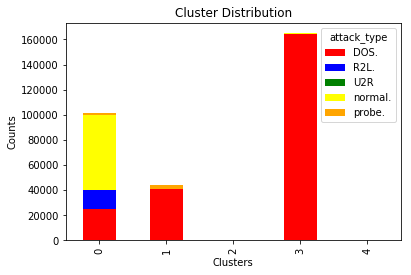

In [145]:
#Doing this for all major attack types in the test dataset

clust_map = pd.concat([cluster_labels,attack_labs_tall],axis=1)
clust_map.columns = ['cluster','attack_type']
type(clust_map)
clust_map.head(10)

df = clust_map.groupby(['cluster','attack_type']).size()
df1 = pd.DataFrame(df).reset_index()
df1.columns = ['cluster','attack_type','counts']
df1.head(20)

df.unstack().plot(kind='bar',stacked=True,  color=['red','blue','green','yellow','orange'], grid=False)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Cluster Distribution')
plt.show()

We see that most of the clusters show one particular type of attack or normal as the dominant type in the cluster. We can do it for more clusters for greater granularity.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,cluster,attack_type,counts
0,0,bad.,164005
1,0,normal.,728
2,1,bad.,41470
3,1,normal.,95
4,2,bad.,717
5,2,normal.,5
6,3,bad.,5
7,4,bad.,18096
8,4,normal.,23
9,5,normal.,1


Text(0.5,0,'Clusters')

Text(0,0.5,'Counts')

Text(0.5,1,'Cluster Distribution')

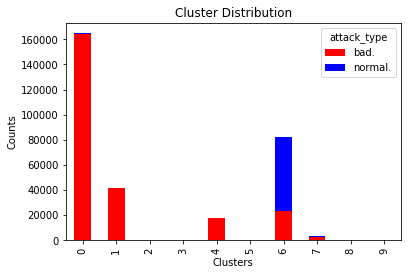

,cluster,attack_type,counts
0,0,DOS.,164001
1,0,R2L.,1
2,0,normal.,728
3,0,probe.,3
4,1,DOS.,40905
5,1,R2L.,5
6,1,U2R,117
7,1,normal.,95
8,1,probe.,443
9,2,R2L.,714


Text(0.5,0,'Clusters')

Text(0,0.5,'Counts')

Text(0.5,1,'Cluster Distribution')

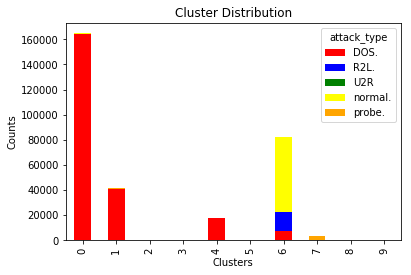

In [148]:
#Clustering for n=10 clusters

kmeans_mod1 = KMeans(n_clusters=10)
kmeans_mod1.fit(kdd_test_10per_scaled) 
labels1 = kmeans_mod1.labels_

#Check with target labels for the test dataset

cluster_labels1 = pd.DataFrame(labels1)
clust_map1 = pd.concat([cluster_labels1,attack_labs_tall],axis=1)
clust_map2 = pd.concat([cluster_labels1,attack_labs_test],axis=1)
clust_map1.columns = ['cluster','attack_type']
clust_map2.columns = ['cluster','attack_type']

df = clust_map2.groupby(['cluster','attack_type']).size()
df1 = pd.DataFrame(df).reset_index()
df1.columns = ['cluster','attack_type','counts']
df1.head(50)

df.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Cluster Distribution')
plt.show()

df = clust_map1.groupby(['cluster','attack_type']).size()
df1 = pd.DataFrame(df).reset_index()
df1.columns = ['cluster','attack_type','counts']
df1.head(50)

df.unstack().plot(kind='bar',stacked=True,  color=['red','blue','green','yellow','orange'], grid=False)
plt.xlabel('Clusters')
plt.ylabel('Counts')
plt.title('Cluster Distribution')
plt.show()

We observe similar results here as well. Hence, we see that even if we do not have a training dataset to train a supervised model on, unsupervised algorithms like clustering can give us a fairly good idea reagarding the classification of "bad" intrusions from "normal" traffic signatures.